## Movie Recommendation 
### Collaborative Based Recommendation Model
     will find similar movie using movie attribute and user information

#### We downloaded the dataset for MoviesLens | GroupLens
        It has 100k datasets and all the necessary information.

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#library 

In [3]:
ratings=pd.read_csv(r'C:\Users\KIIT\Downloads\ml-100k\ml-100k\u.data',sep='\t'
                    ,header=None,names=['user_id','movie_id','ratings',],usecols=[0,1,2])
#reading ratings of different movies from u.data file

In [4]:
ratings.head()

,user_id,movie_id,ratings
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [5]:
ratings.user_id.unique().size #total no. of users

943

In [6]:
ratings.movie_id.unique().size #total no.of moives

1682

In [7]:
ratings.ratings.mean() #average ratings

3.52986

In [57]:
cols="movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western"
cols=cols.split(' | ')
#column names

In [62]:
movie_title=pd.read_csv(r"C:\Users\KIIT\Downloads\ml-100k\ml-100k\u.item",
                        sep='|',encoding='latin',header=None,names=['movie id','movie title'],
                        usecols=[0,1],index_col='movie id')
#reading the movie title with the movie id 
movie_title.head()

,movie title
movie id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)


In [9]:
movies=pd.read_csv(r"C:\Users\KIIT\Downloads\ml-100k\ml-100k\u.item",sep='|',encoding='latin',
                   header=None,names=cols,index_col='movie id')
#reading u.item file 
movies.drop(['movie title', 'release date', 'video release date', 'IMDb URL', 'unknown'], axis=1,inplace=True)
#dropping of unwanted columns

In [10]:
movies.index.unique().size 


1682

In [11]:
len(cols) #total fields

24

In [12]:
movies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

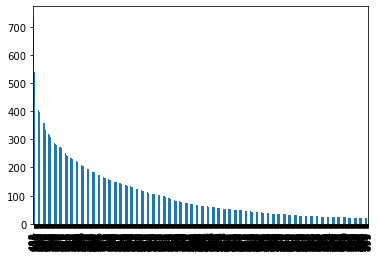

In [13]:
ratings.user_id.value_counts().plot(kind='bar')

In [14]:
ratings.head()

,user_id,movie_id,ratings
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [80]:
movie_ratings=ratings.groupby('movie_id').agg({'ratings':'mean','user_id':'count'})
# displaying the average rating and the no.of user watching a particular movie

In [16]:
movie_ratings.tail()# displaying last 5 rows

,ratings,user_id
movie_id,,
1678,1.0,1
1679,3.0,1
1680,2.0,1
1681,3.0,1
1682,3.0,1


In [17]:
movie_ratings.head()# displaying first 5 rows


,ratings,user_id
movie_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


In [18]:
movie_ratings.groupby('user_id').count()#gives the number of user watching a movie 

,ratings
user_id,
1,141
2,68
3,60
4,64
5,51
...,...
485,1
507,1
508,1


In [20]:
movie_ratings.rename({'ratings': 'avg_rating', 'user_id':'count'}, axis=1, inplace=True)
#renaming the column ratings -> avg_rating  and user_id -> count

In [21]:
movie_ratings.head()

,avg_rating,count
movie_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


## Popularity

$$ \text{Min Max Scaling}=\frac{X_i-min(X)}{max(X)-min(X)} $$

This is used for getting the popularity of a particular movie

In [22]:
x = [ 40, 60, 30, 10, 90, 100 ]#total users
#   [ 30, 50,  20, 0, 80, 90 ]

y = [ round((xi-min(x)) / (max(x) - min(x)), 2) for xi in x ]#poularity value
print(x)
print(y)
# for example

[40, 60, 30, 10, 90, 100]
[0.33, 0.56, 0.22, 0.0, 0.89, 1.0]


In [23]:
movie_ratings['count'].max() #maximum value

583

In [24]:
movie_ratings['count'].min() #minimum value

1

In [25]:
movie_ratings['count'].mean() # mean value

59.45303210463734

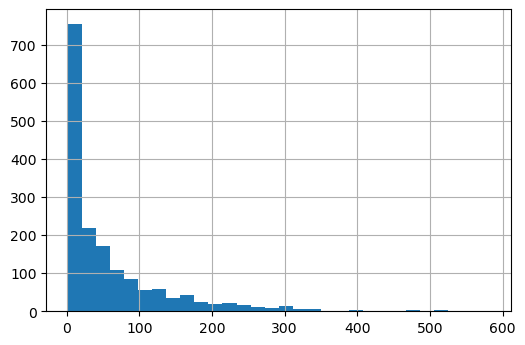

In [28]:
plt.figure(dpi=100)
movie_ratings['count'].hist(bins=30)
plt.show()
#y-axis=no.of movies
#x-axis=total no.of user watching a movie

In [31]:
movie_ratings['count'].quantile(q=[0.25, 0.5, 0.75])

0.25     6.0
0.50    27.0
0.75    80.0
Name: count, dtype: float64

In [36]:
mx=movie_ratings['count'].max()
mi=movie_ratings['count'].min()

movie_ratings['popularity']=movie_ratings['count'].apply( lambda v:round((v-mi)/(mx-mi),2))
# adding the poularity score to our dataframe

In [39]:
#dropping count column as because the count values are right skewed creating a gap between the data
movie_ratings.drop('count' , axis=1 , inplace=True)

In [40]:
movie_ratings

,avg_rating,popularity
movie_id,,
1,3.878319,0.77
2,3.206107,0.22
3,3.033333,0.15
4,3.550239,0.36
5,3.302326,0.15
...,...,...
1678,1.000000,0.00
1679,3.000000,0.00
1680,2.000000,0.00


In [41]:
#merging two dataframe movies and movie_ratings
#hence we are checking if there is any 'NA' value or not

movie_ratings.isna().sum()

avg_rating    0
popularity    0
dtype: int64

In [42]:
movies.isna().sum()

Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64

In [44]:
X=pd.merge(movies , movie_ratings , left_index=True , right_index=True)

In [46]:
X.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_rating,popularity
movie id,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.878319,0.77
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.206107,0.22
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.033333,0.15
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3.550239,0.36
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3.302326,0.15


In [47]:
#checking if the dataframes are merged or not
movie_ratings.loc[45]

avg_rating    4.05
popularity    0.14
Name: 45, dtype: float64

In [51]:
X.loc[45][['avg_rating','popularity']]
# Hence both are having the same value.Therefore the merging is done perfect.

avg_rating    4.05
popularity    0.14
Name: 45, dtype: float64

In [65]:
#50 popular movie
ix_50=movie_ratings.sort_values('popularity', ascending=False)[:50].index
ix_50 #index value for  50 popular movies 

Int64Index([ 50, 100, 181, 258, 294, 286, 288,   1, 300, 121, 174, 127,  56,
             98,   7, 237, 117, 172, 222, 313, 204, 405,  79, 210, 151, 173,
             69, 168, 748, 269, 195, 257, 423, 276,  96,   9,  22, 328, 318,
            302, 118,  15,  25, 183, 216, 176, 202, 234,  64,  89],
           dtype='int64', name='movie_id')

In [68]:
movie_title.loc[ix_50].head(10)
#displaying 10 popular movies

,movie title
movie_id,
50,Star Wars (1977)
100,Fargo (1996)
181,Return of the Jedi (1983)
258,Contact (1997)
294,Liar Liar (1997)
286,"English Patient, The (1996)"
288,Scream (1996)
1,Toy Story (1995)
300,Air Force One (1997)


### Similarity 
     Finding the similarity between two vectors so that we can compare the ratings of different movie and 
                   recommend similar rated movie to the user.


### Formula for distance:

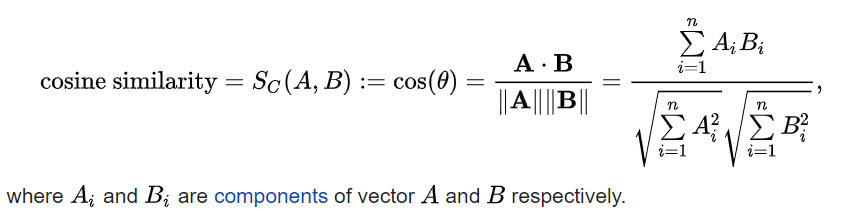

In [71]:
from scipy.spatial.distance import cosine ,euclidean # predefined formulas in library

In [72]:
#example
v1 = np.array([3.2, 0.5])
v2 = np.array([3.2, 0.5])

euclidean(v1, v2)
# as the two vectors are same hence the distance between them will be 0.0 and they have the maximum similarity

0.0

In [73]:
# example
v1 = np.array([ 0, 1, 0, 1, 0])
v2 = np.array([ 1, 0, 1, 0, 1])
print(euclidean(v1, v2))
cosine(v1, v2)
# as the two vectors are different so the distance will more and less similarity

2.23606797749979


1.0

In [74]:
def distance(v1,v2):
    return euclidean(v1,v2)#distance class

In [76]:
def similar_movies(mid,k=5):#mid=movie_id,k=no.of similar movie to be displayed
    X_new=X.loc[mid].values
    result=[]
    for ix , each_movie in zip(X.index,X.values):
        d=distance(X_new,each_movie)
        result.append((d,ix))
    result.sort()
    
    movie_ids = [ ix for d, ix in result[:k] ]
    return movie_title.loc[movie_ids]
        # similarity between different movies

In [77]:
similar_movies(50) #Here our model is giving the similar rated movies as the movie in id 50

,movie title
movie id,
50,Star Wars (1977)
181,Return of the Jedi (1983)
172,"Empire Strikes Back, The (1980)"
498,"African Queen, The (1951)"
222,Star Trek: First Contact (1996)


In [78]:
similar_movies(258,10)#displaying the movie list which are similar to the movie with id 258.

,movie title
movie id,
258,Contact (1997)
7,Twelve Monkeys (1995)
429,"Day the Earth Stood Still, The (1951)"
15,Mr. Holland's Opus (1995)
9,Dead Man Walking (1995)
475,Trainspotting (1996)
196,Dead Poets Society (1989)
282,"Time to Kill, A (1996)"
179,"Clockwork Orange, A (1971)"


#### Hence, we have formed a simple Machine Learning model on Movie Recommendation System. Where we recommend similar movie by comparing there ratings.